# MLOPS - Trabalho integrado

## Integrantes

- RM347975 - Ana Paula Lavieri
- RM347957 - Fernando Costa
- RM348373 - Eduardo Previero
- RM348328 - Filipe Francelino

## Armanezamento da solução

O reposiório foi criado como público no GitHub:

https://github.com/anapaulalavieri/5DTS-MLOPS.git

## FINTECH - QUANTUMFINANCE

A Startup QuantumFinance é uma Fintech, que
esta entrando no mercado para concorrer com
grandes players da área.
 Durante nosso MBA de Data Science & Artificial
Intelligence vamos aplicar ciência de dados e
inteligência artificial para fomentar a expansão
da Startup, em seus diversos segmentos e áreas
de negócio

**Fonte de dados para o trabalho:**

Google Big Query:  emf-teacher.trabalho_loans.loan_default

[Alternativa](https://storage.googleapis.com/ds-publico/IA/loan_default.csv.zip)

## Definições do trabalho

 Após a validação de diversos modelos chegou o momento de produtizar e entrar com os modelos em ambiente produtivo!
 - Implementar em contêiner na plataforma o modelo propensão de inadimplência desenvolvido na disciplina de Estatística.
 - Implementar em contêiner na plataforma o modelo de Clusterização e Classificação desenvolvido na disciplina de Machine Learning.
 - Implementar em contêiner na plataforma o modelo Federated Learning desenvolvido na disciplina de Deep Learning.
 - Manipular imagens em modelos de IA, como visto na disciplina de processamento de imagens

 PONTO EXTRA: Desenvolver uma aplicação streaming dentro do container para chamar o modelo

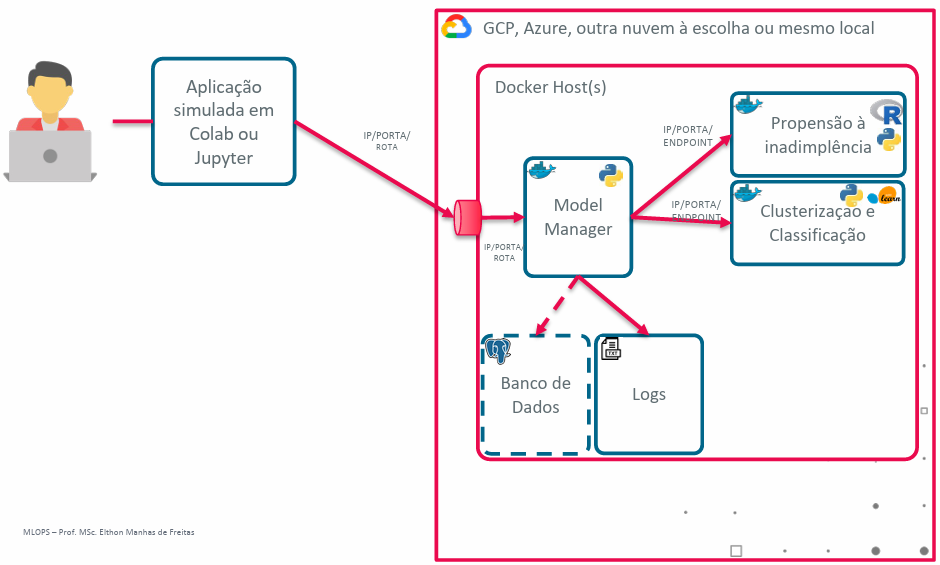

- Vocês vão fazer um painel para um aprovador de empréstimo em uma empresa de crédito pessoal.
- Para isso, será necessário criar alguns modelos customizados
de ML como os que fizemos em aula, e vistos em outras disciplinas.
- Use este notebook como guia: https://colab.research.google.com/drive/1LTDIisUxYKRcr6rcLbQzR7HR4FztA41m

# Parte 1 – Propensão de inadimplência (2,5)

 Implementar em contêiner o modelo propensão de inadimplência desenvolvido na disciplina de Estatística utilizando a linguagem R ou Python.

 1. Treinar um modelo de propensão à inadimplência em R ou em Python, como visto nas aulas de estatística. (0,50)

  Nota: A API só precisa retornar a propensão à inadimplência. A criação de um modelo "fake" que retorna aleatoriamente 0 ou 1 apenas desabona esse 0,50 ponto.

2. Servir o modelo por uma API como as vistas em aula. (0,50)
  
  Nas aulas utilizamos Python + Flask, será necessário utilizar outra tecnologia, por exemplo: R + Plumber

3. Encapsular o modelo em um contêiner (1,50).– O Contêiner deve apenas receber os parâmetros de entrada e retornar a propensão da inadimplência

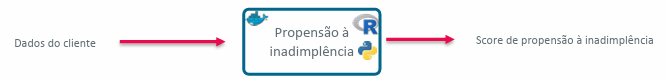

## Solução

Foram implementados 2 modelos de Regressão Logística para Propensão de Inadimplência, um em R outro em Python, para experimentar a disponibilização da API em Plumber e Flask, consecutivamente.

Foi dada à sequência aos exerícios apenas com o modelo implementado em Python.

Tudo o que foi feito está documentado nos arquivos abaixo, localizados na pasta Parte_1:
- MLOPS_Trabalho_Integrado_Parte_1_R.ipynb
- MLOPS_Trabalho_Integrado_Parte_1_Python.ipynb

# Parte 2 – Clusterização e Classificação (2,5)

 Implementar em contêiner na plataforma o modelo de Clusterização e Classificação desenvolvido na disciplina de Machine Learning.

 1. Criar Clusters de clientes que pedem empréstimo, de acordo com o visto na disciplina de Machine Learning (0,25)

  dica: não utilize a coluna target no processo

 2. Analisar cada cluster atribuindo a ele uma label de “persona”, de acordo com as características identificadas nos centróides (caso use k-means) ou majoritariamente nos grupos (0,25)

 3. Identificar a propensão à fraude média de cada grupo (0,25)

 4. Criar API que retorne i) o grupo a que o cliente pertence; ii) o label de persona; iii) a propensão à fraude média do grupo (0,75)

 5. Encapsular o modelo em um contêiner (1,00).– O Contêiner deve apenas receber os parâmetros de entrada e retornar a propensão da inadimplência

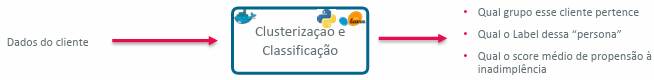

Nota: A API só precisa retornar os dados descritos no requisito 4. A criação de um modelo "fake" que retorna aleatoriamente a saída desejada desabona apenas o 0,75 ponto dos requisitos 1, 2 e 3.

### Solução

Foi implementado um modelo de classificação K-means em Python, e como sugerido, pois disponibilizada uma API em Flask.
Tudo o que foi feito está documentado no arquivo abaixo, localizado na pasta Parte_2:
- MLOPS_Trabalho_Integrado_Parte_2_Python.ipynb

# Parte 3 – Criação da Plataforma Cognitiva (3,0)

 Criar Host para servir à plataforma em nuvem de sua preferência (IaaS) ou localmente

 Neste host, criar gestor de modelos (Model Manager) que (1,0):
 - Recebe os parâmetros dos clientes
 - Recebe qual modelo deve ser chamado
 - Armazena Log de entradas e saídas para análise de desvio

 Criar uma rota para extração das execuções da plataforma para
 possibilitar monitoramento de chamadas e desvios (0,50);
 - dica: Pode ser feito no model manager

 Exibir exemplo de desvio na sua plataforma:
 - ModelDrift(0,50)
 - Target Drift (0,50)
 - Data Drift(0,50)
 - Criar baseline
 - Após chamadas, comparar com o baseline
 - Senecessário, usar notebook separado para explicar melhor os desvios

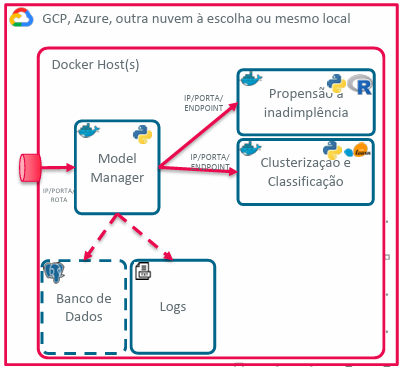

### Solução

#### Criação da máquina Virtual

Foi criada uma instância denominada **MLOPSvm** no Microsoft Azure Virtual Machines:

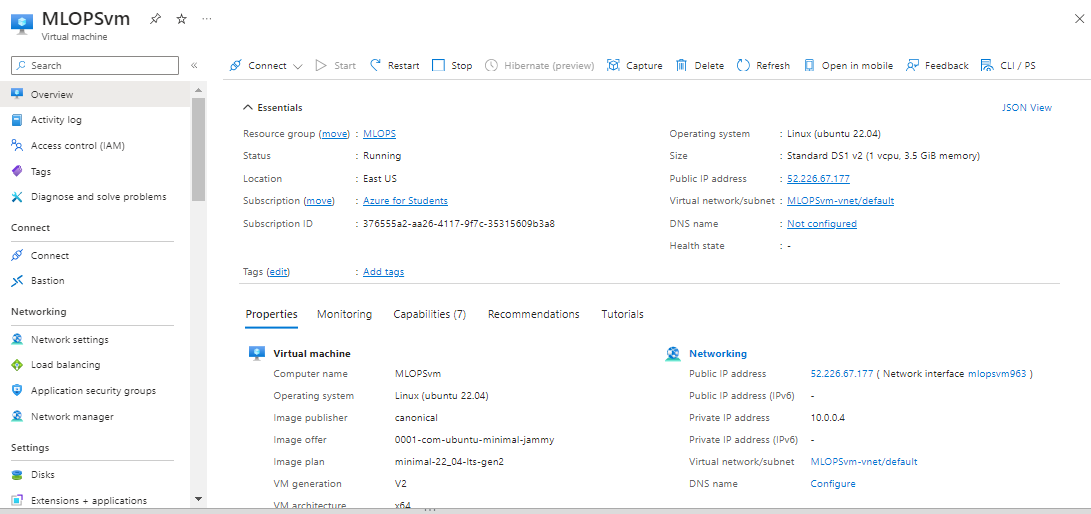

Obs.: Para fins de testar as APIs do container de forma local, foi adicionada uma nova "Inbound Port Rules", conforme podemos verificar a seguir:

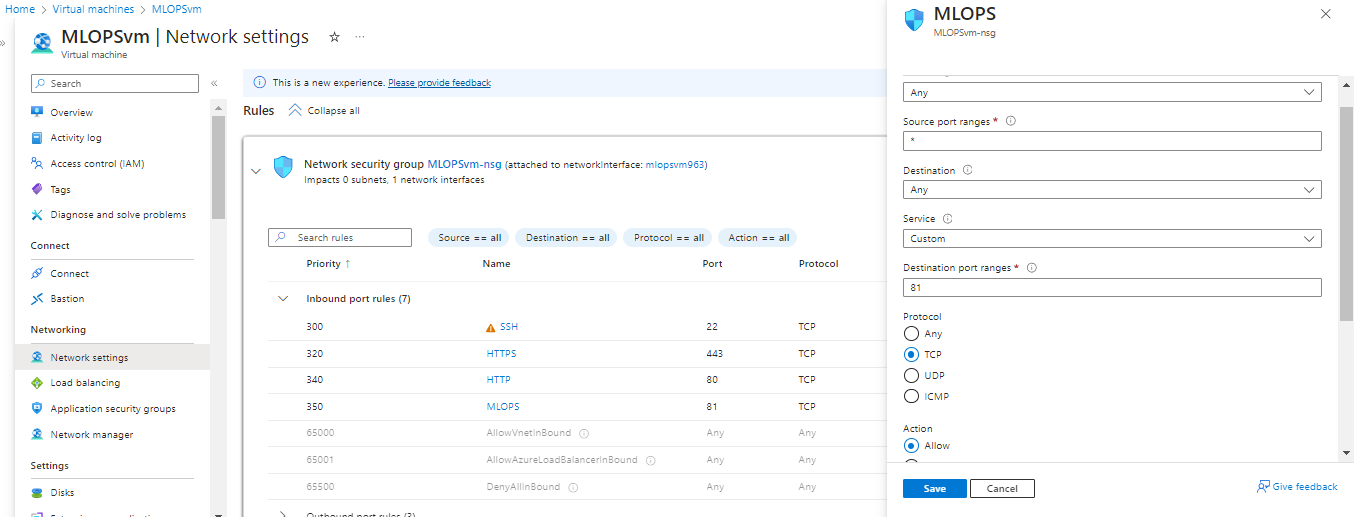

Obs. Utilizamos o Cloud Shell da própria Azure para dar prosseguimento aos passos seguintes, mas pode-se fazer em Terminal ou CMD.

Para acessar a máquina virtual criada, utilizar o comando abaixo, informando a senha quando solicitado:

```
ssh vm-grupo-mlops@52.226.67.177
```

#### Preparando a imagem Docker

Já conectado à VM, executar os comandos a seguir. Alguns deles levans alguns segundos para processar:
```
sudo apt-get update
sudo apt install docker.io
sudo systemctl start docker
sudo systemctl enable docker
sudo apt install nano
```

#### Importar os arquivos de instalação salvos no GitHub

Obs.: Os arquivos foram todos previamente salvos e publicados no GitHub

```
git clone https://github.com/anapaulalavieri/5DTS-MLOPS.git
```



Na sequência, acesse a pasta do projeto:
```
cd 5DTS-MLOPS
```

#### Montagem dos containers e definições de ambiente

Foram criados 2 arquivos para facilitar a instalação da solução.
É possível executar cada comando manualmente no Cloud Shell, adicionando a palavra "sudo" para cada comando

**Arquivo de instalação - setup_environment.sh:**
```
echo "Creating docker images for all containers"
docker build -t parte1_api -f Parte_1/dockerbuilds/Dockerfile Parte_1/api/
docker build -t parte2_api -f Parte_2/dockerbuilds/Dockerfile Parte_2/api/
docker build -t modelmanager -f Parte_3/dockerbuilds/Dockerfile Parte_3/api/
docker build -t frontendstreamlit -f Parte_4/dockerbuilds/Dockerfile Parte_4/api/

echo "Creating network --------------------------------------------------------------------"
docker network create plat_network

echo "Deploying containers for predictions ------------------------------------------------"
docker run -d --restart always --network plat_network --name parte1_api parte1_api
docker run -d --restart always --network plat_network --name parte2_api parte2_api

echo "Updanting config file ---------------------------------------------------------------"
bash ./Parte_3/update_config.sh

echo "Config model manager ----------------------------------------------------------------"
docker run -d --restart always --network plat_network -p 81:8080 -v $(pwd)/Parte_3/api/config:/myServer/config -v $(pwd)/Parte_3/docker/log:/myServer/log --name modelmanager modelmanager

echo "Updating microservices.json for access API from Frontend ----------------------------"
bash ./Parte_4/update_config.sh

echo "Config FrontEnd ---------------------------------------------------------------------"
docker run -d --restart always --network plat_network -p 80:8501 -v $(pwd)/Parte_4/api/config:/myServer/config --name frontendstreamlit frontendstreamlit

echo "Conferindo os containers criados ----------------------------------------------------"
docker network inspect plat_network
```

Nesse arquivo estamos:
- Montando 4 containers, 1 para cada parte da solução. Nessa montagem, já é executado automaticamente o arquivo **Dockerfile**, necessário para instalar cada uma das Partes nos containers criados.
  - parte1_api
  - parte2_api
  - modelmanager
  - frontendstreamlit
- Preparando uma rede, denominada **plat_network**
- Deployando o container de cada modelo preditivo
- Atualizando o arquivo de configuração do ModelManager com os IPs de cada containder deployado
- Deployando o container do Model Manager
- Atualizando o arquivo de configuração do Frontend (Streamlit) com o IP do Model Manager deployado
- Deployando o container do FrontEnd

**Arquivo de desinstalação - reset_environment.sh:**
```
# Interrompendo os containers
docker stop parte1_api
docker stop parte2_api
docker stop modelmanager
docker stop frontendstreamlit

# Removendo os containers
docker rm parte1_api
docker rm parte2_api
docker rm modelmanager
docker rm frontendstreamlit

# Removendo a network
docker network rm plat_network
```

Para executar cada um desses arquivos devemos executar os comandos a seguir (lembrando que o reset_environment.sh deve ser executado apenas em caso de necessidade)
INSTALAÇÂO:
```
sudo bash setup_environment.sh
```

DESINSTALAÇÂO:
```
sudo bash reset_environment.sh
```

Obs.: O arquivo de instalação leva um tempo considerável para ser executado.

Para conferir os containters criados podemos executar:

```
sudo docker ps
```
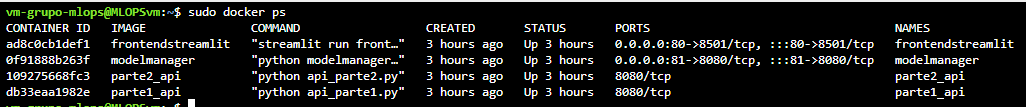


```
sudo docker network inspect plat_network
```

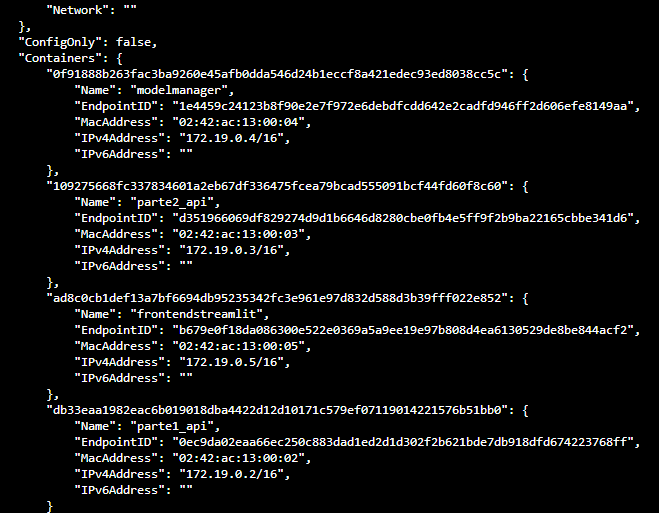

#### Evidência dos testes - Máquina virtual

**Verificando a execução do Model Manager:**
```
curl http://172.19.0.4:8080/
```

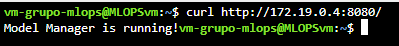

**Executando a API de Propensão de Inadimplência a partir do Model Manager:**
```
curl -X POST -H "Content-Type: application/json" -d '{"model":"parte1_api","features": [{"loan_limit": "cf","approv_in_adv": "nopre","loan_type": "type3","loan_purpose": "p4","Credit_Worthiness": "l1","Interest_rate_spread": 0.39,"Neg_ammortization": "not_neg","interest_only": "not_int","lump_sum_payment": "lpsm","occupancy_type": "ir","total_units": "1U","credit_type": "CRIF","co_applicant_credit_type": "EXP","age": "25-34","submission_of_application": "to_inst","Region": "North"}]}' http://172.19.0.4:8080/predict?model=parte1_api
```
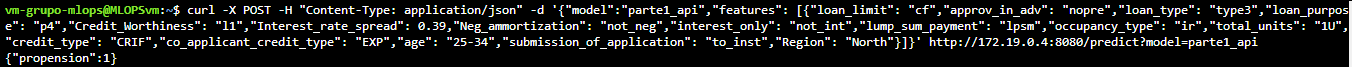

**Executando a API de Clusterização a partir do Model Manager:**
```
curl -X POST -H "Content-Type: application/json" -d '{"model":"parte1_api","features": [{"loan_limit": "cf","approv_in_adv": "nopre","loan_type": "type3","loan_purpose": "p4","Credit_Worthiness": "l1","Interest_rate_spread": 0.39,"Neg_ammortization": "not_neg","interest_only": "not_int","lump_sum_payment": "lpsm","occupancy_type": "ir","total_units": "1U","credit_type": "CRIF","co_applicant_credit_type": "EXP","age": "25-34","submission_of_application": "to_inst","Region": "North"}]}' http://172.19.0.4:8080/predict?model=parte2_api
```
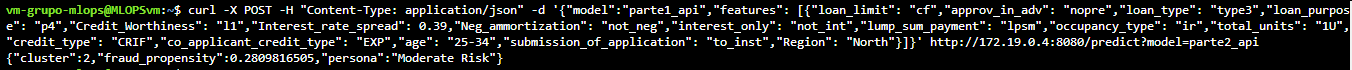

#### Evidência dos testes - Máquina local

Para fins de teste, as APIs foram disponibilizadas também fora do ambiente virtual. Vamos, então, utilizar o Postman para execução de tais testes.

**Verificando a execução do Model Manager:**

GET

url: http://52.226.67.177:81/

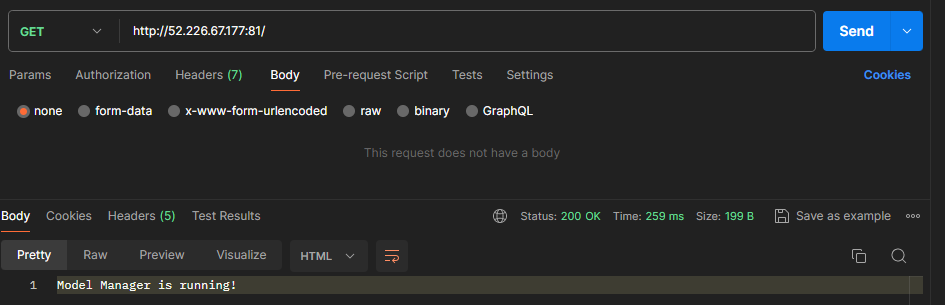

**Executando a API de Propensão de Inadimplência a partir do Model Manager:**

POST

url: http://52.226.67.177:81/predict?model=parte1_api

Payload:
```
{
    "features": [
        {
            "loan_limit": "cf",
            "approv_in_adv": "nopre",
            "loan_type": "type3",
            "loan_purpose": "p4",
            "Credit_Worthiness": "l1",
            "Interest_rate_spread": 10.39,
            "Neg_ammortization": "not_neg",
            "interest_only": "not_int",
            "lump_sum_payment": "lpsm",
            "occupancy_type": "ir",
            "total_units": "4U",
            "credit_type": "CRIF",
            "co_applicant_credit_type": "EXP",
            "age": "25-34",
            "submission_of_application": "to_inst",
            "Region": "North"
        }
    ]
}
```
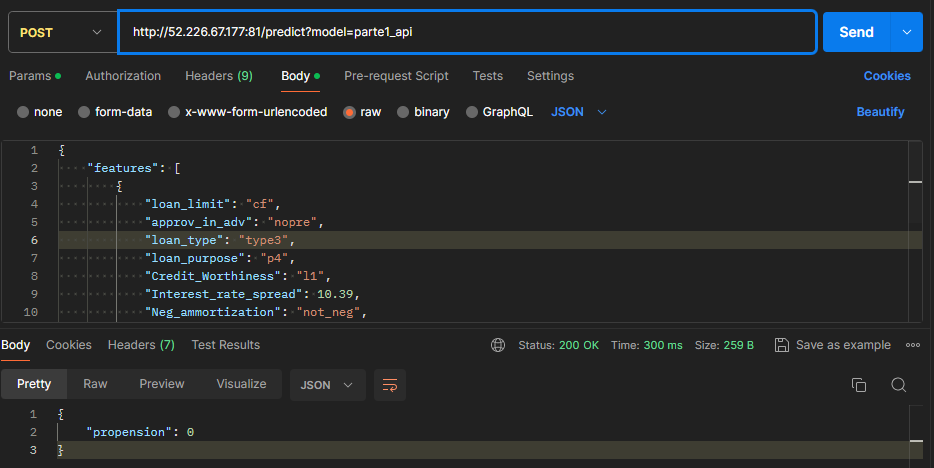

**Executando a API de Clusterização a partir do Model Manager:**

POST

url: http://52.226.67.177:81/predict?model=parte2_api

Payload:
```
{
    "features": [
        {
            "loan_limit": "cf",
            "approv_in_adv": "nopre",
            "loan_type": "type3",
            "loan_purpose": "p4",
            "Credit_Worthiness": "l1",
            "Interest_rate_spread": 10.39,
            "Neg_ammortization": "not_neg",
            "interest_only": "not_int",
            "lump_sum_payment": "lpsm",
            "occupancy_type": "ir",
            "total_units": "4U",
            "credit_type": "CRIF",
            "co_applicant_credit_type": "EXP",
            "age": "25-34",
            "submission_of_application": "to_inst",
            "Region": "North"
        }
    ]
}
```
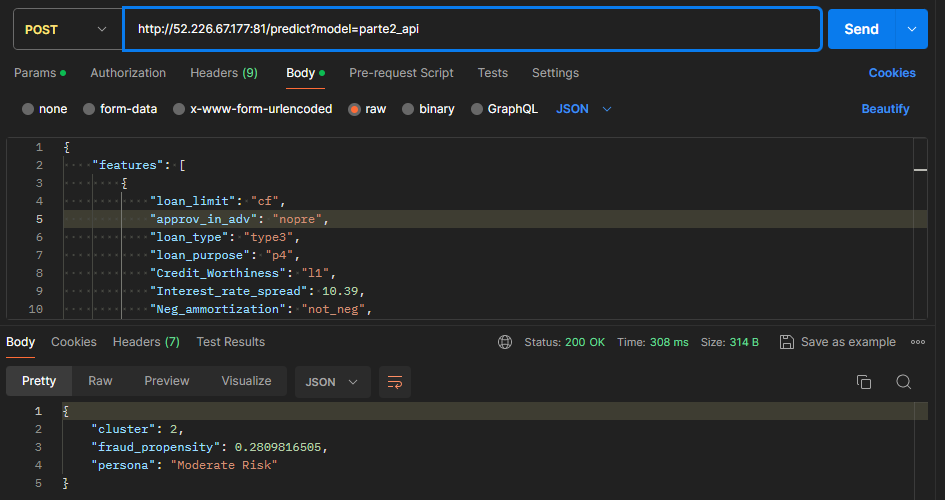

Obs.: As collections para execução dessas APIs, assim como das APIs locais, estão salvas neste arquivo: **FIAP - MLOPS Trabalho Integrado.postman_collection.json**.

#  Parte 4 – Transformação em Solução Corporativa (2,0)

Objetivo: O grupo deve mostrar que sabe consumir modelos de Machine Learning em um problema de negócio, através de uma aplicação cliente simulada

- Criar aplicação simulada para aprovação de Crédito (utilizar o Colab Notebook ou Jupyter)
  -2 pontos extras para o grupo que fizer um novo Front-End (mais créditos de autoria, caso eu venha utilizá-lo)

- Modelos Customizados de ML (0,5):
  - Chamar os modelos customizados de ML;
  - Apresentar o resultado dos modelos;
  - Fazer uma sugestão de acordo com o resultado dos modelos customizados de ML

- Gravar vídeo "operando" o notebook e simulando a avaliação com concessão ou reprovação do crédito. (1,5)

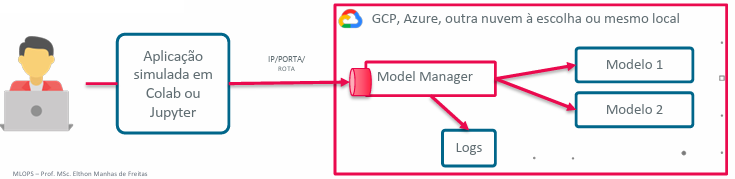

# Trabalho Final -  Submissão

- Submeter todos os códigos necessário e demonstrados.
- Organizar as partes em sub-pastas e compactar tudo; Cuidado com arquivos temporários Python e de ambiente que costumam deixar a pasta muito grande, caso não sejam apagados
- Submeter os vídeos na plataforma da FIAP, se o vídeo ficar muito grande, submeter ao Youtube (pode ser privado) ou outra plataforma de compartilhamento (que tal um bucket numa cloud) e anexar o Link.
  
    - Obs.: Garantir que o vídeo será acessível pelo usuário elthon@alumni.usp.br
    - Dica: Você pode usar estes vídeos para divulgar seu trabalho como Engenheiro de ML